# [Working with Strings in Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html)
In this lesson, we'll learn a few string cleaning tasks such as:
- Finding specific strings or substrings in columns
- Extracting substrings from unstructured data
- Removing strings or substrings from a series
We'll work with the 2015 World Happiness Report and additional economic data from the World Bank. The data set can be found [here](https://www.kaggle.com/worldbank/world-development-indicators/version/2)

In [1]:
import numpy as np
import pandas as pd
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
world_dev = pd.read_csv("World_dev.csv")
world_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   CountryCode                                 247 non-null    object 
 1   ShortName                                   247 non-null    object 
 2   TableName                                   247 non-null    object 
 3   LongName                                    247 non-null    object 
 4   Alpha2Code                                  244 non-null    object 
 5   CurrencyUnit                                214 non-null    object 
 6   SpecialNotes                                164 non-null    object 
 7   Region                                      214 non-null    object 
 8   IncomeGroup                                 214 non-null    object 
 9   Wb2Code                                     246 non-null    object 
 10  NationalAccoun

In [2]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

### (Merging the Dataframes)[https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html] and (Renaming Exceptionally Long Columns)[https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html]

In [3]:
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}
merged=pd.merge(left=happiness2015,right=world_dev,how='left',left_on='Country',right_on='ShortName')
merged=merged.rename(col_renaming,axis=1)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region_x                       158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  CountryCode                    145 non-null    obj

### Using (`apply()`)[https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html] to Transform Strings

In [4]:
def extract_last_word(element):
    element=str(element)
    last_word=element.split()[-1]
    return last_word
merged['Currency Apply']=merged['CurrencyUnit'].apply(extract_last_word)
print(merged['Currency Apply'].head())

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Apply, dtype: object


### Using Vectorized (String Methods)[https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html] instead of `apply()`
`Series.str.split()`	Splits each element in the Series.
`Series.str.strip()`	Strips whitespace from each string in the Series.
`Series.str.lower()`	Converts strings in the Series to lowercase.
`Series.str.upper()`	Converts strings in the Series to uppercase.
 `Series.str.get()`	    Retrieves the ith element of each
`Series.str.replace()`	Replaces a regex or string in the Series with another string.
`Series.str.cat()`	    Concatenates strings in a Series.
`Series.str.extract()`	Extracts substrings from the Series matching a regex pattern.

- We access these vectorized string methods by adding a str between the Series name and method name:
`Series.str.method_name()`
- The str attribute indicates that each object in the Series should be treated as a string, without us having to explicitly change the type to a string like we did when using the apply method.
- Note that we can also slice each element in the Series to extract characters, but we'd still need to use the str attribute. For example, below we access the first five characters in each element of the CurrencyUnit column:
`merged['CurrencyUnit'].str[0:5]`
`0    Swiss
 1    Icela
 2    Danis
 3    Norwe
 4    Canad
Name: CurrencyUnit, dtype: object`
- Vectorized string methods can be chained.
`merged['CurrencyUnit'].str.upper().str.split()`
`0    [AFGHAN, AFGHANI]
 1      [ALBANIAN, LEK]
 2    [ALGERIAN, DINAR]
 3       [U.S., DOLLAR]
 4               [EURO]`

In [5]:
merged['Currency Vectorized']=merged['CurrencyUnit'].str.split().str.get(-1)
print(merged['Currency Vectorized'].head())

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object


### Exploring Missing Values with Vectorized String Methods
Vectorized string methods results in:
- Better performance
- Code that is easier to read and write
First, let's use the `Series.isnull()` method to confirm if there are any missing values in the column: 
```
merged['CurrencyUnit'].isnull().sum()
13

ef compute_lengths(element):
    return len(str(element))
lengths_apply = merged['CurrencyUnit'].apply(compute_lengths)
lengths_apply.value_counts(dropna=False)

14    21
4     20
12    17
13    14
3     13
15    13
16    12
18     9
17     9
11     8
22     7
25     5
19     3
9      2
26     1
20     1
23     1
10     1
39     1
```
Name: CurrencyUnit, dtype: int64

So, we have identified an additional benefit of using vectorized string methods - they exclude missing values:
***Automatically excludes missing values***



In [6]:
lengths=merged['CurrencyUnit'].str.len()
value_counts=lengths.value_counts(dropna=False)
print(value_counts)

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
10.0     1
39.0     1
26.0     1
23.0     1
20.0     1
Name: CurrencyUnit, dtype: int64


### Finding Specific Words in a String
We can handle problems like this with `regular expressions`, or `regex` for short. A regular expression is a sequence of characters that describes a search pattern, used to match characters in a string.
In pandas, regular expression is integrated with vectorized string methods to make finding and extracting patterns of characters easier. However, the rules for creating regular expressions can be quite complex and can be found [here](https://docs.python.org/3.4/library/re.html)
We will use `Series.str.contains()` method' to find exression containing string being searched for.

In [7]:
pattern = r"[Nn]ational accounts"
national_accounts=merged['SpecialNotes'].str.contains(pattern)
print(national_accounts.head())
national_accounts.value_counts(dropna=False)
#boolean indexing to return only the rows containing ''[Nn]ational accounts'
# will give value error 'ValueError: cannot mask with array containing NA / NaN values' if na!=False in the method `Series.str.contains(self, pat, case=True, flags=0, na=nan, regex=True)` 
#merged[national_accounts]# 

0     NaN
1     NaN
2     NaN
3     NaN
4    True
Name: SpecialNotes, dtype: object


True     65
True     54
False    39
Name: SpecialNotes, dtype: int64

In [8]:
pattern = r"[Nn]ational accounts"
national_accounts=merged['SpecialNotes'].str.contains(pattern,na=False) #na is set to False
merged_national_accounts=merged[national_accounts]
print(merged_national_accounts.info())
print(merged_national_accounts.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 4 to 157
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        54 non-null     object 
 1   Region_x                       54 non-null     object 
 2   Happiness Rank                 54 non-null     int64  
 3   Happiness Score                54 non-null     float64
 4   Standard Error                 54 non-null     float64
 5   Economy (GDP per Capita)       54 non-null     float64
 6   Family                         54 non-null     float64
 7   Health (Life Expectancy)       54 non-null     float64
 8   Freedom                        54 non-null     float64
 9   Trust (Government Corruption)  54 non-null     float64
 10  Generosity                     54 non-null     float64
 11  Dystopia Residual              54 non-null     float64
 12  CountryCode                    54 non-null     obje

### Extracting Substrings from a Series using (`Series.str.extract(self, pat, flags=0, expand=True)[source]` method)[https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html].
With regular expressions, we use the following syntax to indicate a character could be a range of numbers: `pattern = r"[0-9]"`
And we use the following syntax to indicate a character could be a range of letters:
```
#lowercase letters
pattern1 = r"[a-z]"

#uppercase letters
pattern2 = r"[A-Z]"
```
We could also make these ranges more restrictive. For example, if we wanted to find a three character substring in a column that starts with a number between 1 and 6 and ends with two letters of any kind, we could use the following syntax: `pattern = r"[1-6][a-z][a-z]`
If we have a pattern that repeats, we can also use curly brackets { and } to indicate the number of times it repeats: `pattern = r"[1-6][a-z][a-z]" = r"[1-6][a-z]{2}"

In [9]:
pattern =r"([1-2][0-9][0-9][0-9])"
years=merged['SpecialNotes'].str.extract(pattern)
years.describe()

,0
count,81
unique,20
top,2010
freq,14


When we used the Series.str.extract() method, we enclosed our regular expression in parentheses. The parentheses indicate that only the character pattern matched should be extracted and returned in a series. We call this a capturing group. 
If the capturing group doesn't exist in a row (or there is no match) the value in that row is set to NaN instead.
We can also return the results as a dataframe by changing the expand parameter to True.



In [10]:
pattern = r"([1-2][0-9]{3})" # use {} to indicate repetion for [0-9]
years=merged['SpecialNotes'].str.extract(pattern,expand=True)
years.info()
years.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       81 non-null     object
dtypes: object(1)
memory usage: 2.5+ KB


,0
count,81
unique,20
top,2010
freq,14


### ### Extracting all Matches of a Pattern  from a Series using [`Series.str.extractall(self, pat, flags=0))`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extractall.html).
Above we learned we could use the Series.str.extract() method to extract a pattern of characters from a column as a dataframe by setting the expand parameter equal to True. However, the `Series.str.extract()` method will only extract the first match of the pattern. If we wanted to extract all of the matches, we can use the Series.str.extractall() method.
We cab aksi make the results easier to read by using the [`df.set_index()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html) method to set the Country column as the index.
We can use a named capturing group. Using a named capturing group means that we can refer to the group by the specified name instead of just a number. We can use the following syntax to add a name: `(?P<Column_Name>...)`.
We sill look at the `IESurvey column` next. This column has years in two different formats:
`Integrated household survey (IHS), 2012
Integrated household survey (IHS), 2010/11`


In [11]:
merged = merged.set_index('Country')
pattern = r"(?P<Years>[1-2][0-9]{3})"
years=merged['IESurvey'].str.extractall(pattern)
value_counts=years['Years'].value_counts()
print(value_counts)


2012    33
2010    28
2011    22
2013    12
2009     8
2005     6
2008     6
2007     4
2004     3
2000     1
1995     1
1999     1
2003     1
1998     1
1992     1
2002     1
2006     1
Name: Years, dtype: int64


### Extracting more than one Group of Patterns from a Series
Above, when we tried to extract all of the years from the IESurvey column using the `extractall` method , we were unsuccessful because some of our years had the following format: 2018/19
If we wanted to extract the second, abbreviated year, we'd have to specify two more groups - one to extract the / and one to extract the last two digits.
```
pattern = r"(?P<First_Year>[1-2][0-9]{3})(/)?(?P<Second_Year>[0-9]{2})?"
years = merged['IESurvey'].str.extractall(pattern)
```
we also added a question mark, ?, after each of the two new groups to indicate that a match for those groups is optional. This allows us to extract years listed in the yyyy format AND the yyyy/yy format at once.
In the following code, we'll extract just the years from the IESurvey column. Then, we'll reformat the second year so that it contains all four digits of the year. We will use 

In [21]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})(/)?(?P<Second_Year>[0-9]{2})?"# not enclosing '/' in () will have resulting dataframe having only 'First_Year' and 'Second_Year' columns
years=merged['IESurvey'].str.extractall(pattern)
first_two_year=years['First_Year'].str[:2]
years['Second_Year']=first_two_year+years['Second_Year']
print(years.head(40))
print(years.tail(40))


                          First_Year    1 Second_Year
Country             match                            
Switzerland         0           2004  NaN         NaN
Iceland             0           2010  NaN         NaN
Denmark             0           2010  NaN         NaN
Norway              0           2010  NaN         NaN
Canada              0           2010  NaN         NaN
Finland             0           2010  NaN         NaN
Netherlands         0           2010  NaN         NaN
Sweden              0           2005  NaN         NaN
Australia           0           2003  NaN         NaN
Israel              0           2010  NaN         NaN
Costa Rica          0           2012  NaN         NaN
Austria             0           2004  NaN         NaN
Mexico              0           2012  NaN         NaN
United States       0           2010  NaN         NaN
Brazil              0           2012  NaN         NaN
Ireland             0           2010  NaN         NaN
Belgium             0       

### Summary
In this lesson, we explored the benefits of using vectorized string methods, along with a couple methods that can be used to perform tasks such as finding substrings, extracting substrings, and removing substrings from columns. You can find the full list of vectorized string methods (here)[https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html].

Let's summarize what we learned about the `Series.str.extractall()` method and pandas string operations in the last exercise:

- If part of the regex isn't grouped using parantheses, (), it won't be extracted.
- When we add a string to a column using the plus sign, +, pandas will add that string to every value in the column. Note that the strings will be added together without any spaces.



Country
Switzerland    HIGH OECD
Iceland        HIGH OECD
Denmark        HIGH OECD
Norway         HIGH OECD
Canada         HIGH OECD
Name: IncomeGroup, dtype: object


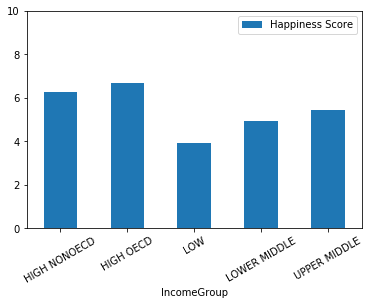

In [23]:
merged['IncomeGroup'] = merged['IncomeGroup'].str.replace(' income', '').str.replace(':', '').str.upper()
print(merged['IncomeGroup'].head())
import matplotlib.pyplot as plt
pv_incomes = merged.pivot_table(values='Happiness Score', index='IncomeGroup')
pv_incomes.plot(kind='bar', rot=30, ylim=(0,10))
plt.show()